In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect("hospital_analysis.db")

In [3]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in database:", tables)

Tables in database: Empty DataFrame
Columns: [name]
Index: []


In [5]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)


Empty DataFrame
Columns: [name]
Index: []


In [6]:
import sqlite3
import pandas as pd
df = pd.read_csv("cleaned_hospital_data.csv")

conn = sqlite3.connect("hospital_analysis.db")

df.to_sql("hospital_data", conn, index=False, if_exists="replace")


100

In [7]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in your database:", tables)


Tables in your database:             name
0  hospital_data


In [8]:
df = pd.read_sql_query("SELECT * FROM hospital_data;", conn)
df.head()


,Patient ID,Doctor,Department,Treatment Start Date,Discharge Date,Treatment Cost,Recovery,Stay Duration (Days)
0,P1000,Dr. Banerjee,Cardiology,2023-04-13,2023-04-18,40743,In Progress,5
1,P1001,Dr. Kapoor,General Medicine,2023-06-29,2023-07-08,11102,In Progress,9
2,P1002,Dr. Sharma,Neurology,2023-04-03,2023-04-12,24778,Recovered,9
3,P1003,Dr. Banerjee,Pediatrics,2023-01-15,2023-01-17,31641,Not Recovered,2
4,P1004,Dr. Sharma,General Medicine,2023-04-17,2025-06-21,39584,Recovered,796


In [10]:
print(df.columns)


Index(['Patient ID', 'Doctor', 'Department', 'Treatment Start Date',
       'Discharge Date', 'Treatment Cost', 'Recovery', 'Stay Duration (Days)'],
      dtype='object')


In [12]:
avg_cost_per_doctor = pd.read_sql_query("""
    SELECT Doctor, AVG([Treatment Cost]) AS Avg_Treatment_Cost
    FROM hospital_data
    GROUP BY Doctor;
""", conn)


In [13]:
busiest_departments = pd.read_sql_query("""
    SELECT Department, COUNT(*) AS Patient_Count
    FROM hospital_data
    GROUP BY Department
    ORDER BY Patient_Count DESC;
""", conn)


<Axes: xlabel='Recovery'>

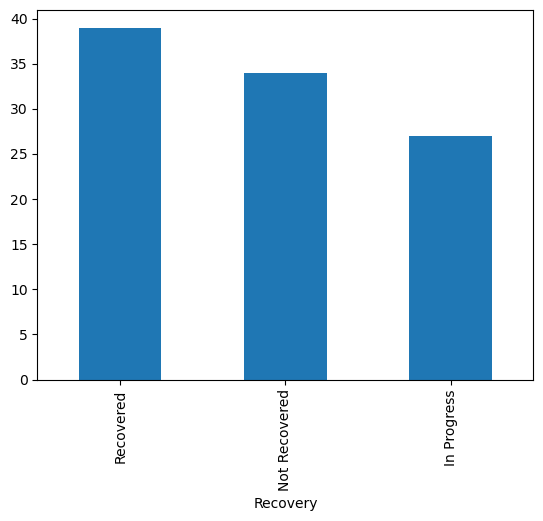

In [19]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')
df['Treatment Start Date'] = pd.to_datetime(df['Treatment Start Date'], errors='coerce')
df['Discharge Date'] = df['Discharge Date'].ffill()

df['Recovery'].value_counts().plot(kind='bar')


In [16]:
avg_cost_per_doctor = pd.read_sql_query("""
    SELECT Doctor, AVG([Treatment Cost]) AS Avg_Treatment_Cost
    FROM hospital_data
    GROUP BY Doctor;
""", conn)
print("\nAverage Treatment Cost per Doctor:")
print(avg_cost_per_doctor)

busiest_departments = pd.read_sql_query("""
    SELECT Department, COUNT(*) AS Patient_Count
    FROM hospital_data
    GROUP BY Department
    ORDER BY Patient_Count DESC;
""", conn)
print("\nBusiest Departments:")
print(busiest_departments)



Average Treatment Cost per Doctor:
         Doctor  Avg_Treatment_Cost
0  Dr. Banerjee        23396.750000
1    Dr. Kapoor        28015.727273
2     Dr. Mehta        24723.066667
3     Dr. Reddy        27767.117647
4    Dr. Sharma        22959.181818

Busiest Departments:
         Department  Patient_Count
0  General Medicine             29
1        Cardiology             23
2        Pediatrics             16
3       Orthopedics             16
4         Neurology             16


In [18]:
# 📌 Step 5: Data Cleaning (Pandas)df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')
df['Discharge Date'] = df['Discharge Date'].ffill()
df['Treatment Start Date'] = pd.to_datetime(df['Treatment Start Date'], errors='coerce')


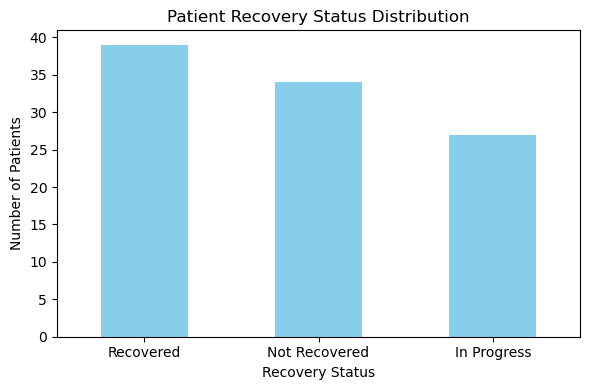

In [20]:
plt.figure(figsize=(6, 4))
df['Recovery'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Patient Recovery Status Distribution")
plt.xlabel("Recovery Status")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


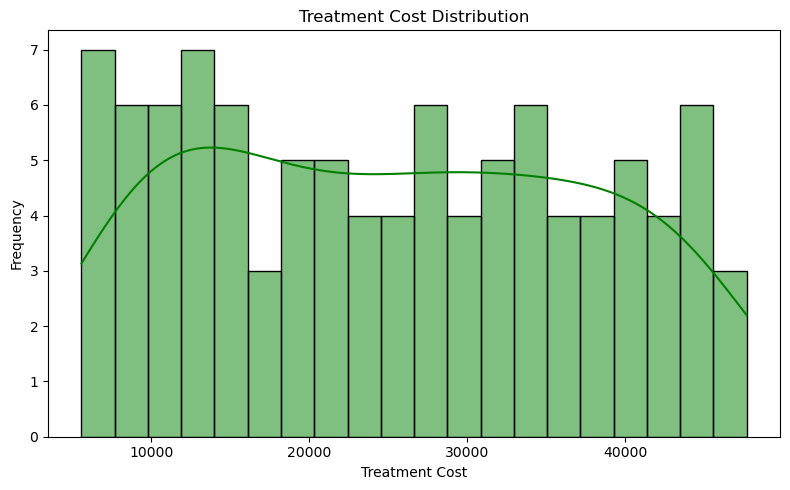

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Treatment Cost'], bins=20, kde=True, color='green', edgecolor='black')
plt.title("Treatment Cost Distribution")
plt.xlabel("Treatment Cost")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [22]:
df.to_csv("cleaned_hospital_data.csv", index=False)
print("✅ Cleaned dataset saved as cleaned_hospital_data.csv")


✅ Cleaned dataset saved as cleaned_hospital_data.csv


In [23]:
print("\nDataset Summary:")
print(df.describe())

print("\nColumn Info:")
print(df.info())



Dataset Summary:
      Treatment Start Date       Discharge Date  Treatment Cost  \
count                  100                  100      100.000000   
mean   2023-03-26 17:31:12  2023-06-02 21:36:00    25258.570000   
min    2023-01-02 00:00:00  2023-01-03 00:00:00     5569.000000   
25%    2023-02-17 18:00:00  2023-02-22 00:00:00    13614.750000   
50%    2023-03-29 00:00:00  2023-04-02 12:00:00    24917.000000   
75%    2023-05-10 06:00:00  2023-05-20 06:00:00    36090.250000   
max    2023-06-29 00:00:00  2025-06-21 00:00:00    47675.000000   
std                    NaN                  NaN    12454.337201   

       Stay Duration (Days)  
count            100.000000  
mean              68.170000  
min                1.000000  
25%                3.000000  
50%                5.000000  
75%                8.000000  
max              848.000000  
std              216.175203  

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 c

📌 Title: Hospital Patient & Treatment Analysis Project

🔹 Project Objective
This project analyzes hospital patient treatment records to help improve healthcare services using real data. The goal is to extract meaningful insights using SQL, process and clean data using Python (Pandas), and present findings through interactive dashboards in Power BI.

🔹 Tools Used
SQL (SQLite) – to query patient records

Python (Pandas, Matplotlib, Seaborn) – for cleaning and analysis

Power BI – to build dashboards

🔹 Dataset Description
The dataset contains hospital records with the following fields:

Patient ID

Doctor

Department

Treatment Start Date

Discharge Date

Treatment Cost

Recovery Status

Stay Duration (Days)

🔹 Project Tasks and Implementation
✅ SQL Tasks:
Average Treatment Cost per Doctor
Used SQL aggregation to calculate average cost grouped by each doctor.

Busiest Departments
Used SQL COUNT(*) and GROUP BY to find departments with the highest patient volume.

✅ Pandas (Python) Tasks:
Data Cleaning:
Converted date columns to datetime format and filled missing discharge dates using forward fill.

Recovery Trend Analysis:
Visualized recovery status distribution using a bar plot.

Cost Analysis:
Used a histogram to show treatment cost distribution.

✅ Power BI Dashboard:
Created a dashboard with:

Patient recovery trends

Doctor performance (cost-based)

Department-wise statistics

Visual filters and slicers